In [1]:
import xarray as xr
import intake
from glob import glob

In [2]:
import pandas as pd

In [ ]:
# simplify location csv
# This section simplifies the csv file to exclude extraneous data
# the shell script (data_extraction.sh) only requires code, lon, and lat

In [10]:
locations_df = pd.read_csv("/g/data/mn51/users/gt3409/TimeSeriesExtraction/UCL_2021_AUST_with_location_top_33.csv", 
                           header=0,)
locations_df

,OBJECTID,UCL_CODE21,UCL_NAME21,SSR_CODE21,SSR_NAME21,SOS_CODE21,SOS_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,ORIG_FID,Longitude,Latitude
0,1,101001,Sydney,101,1 million or more,10,Major Urban,1,New South Wales,AUS,Australia,2194.1731,https://linked.data.gov.au/dataset/asgsed3/UCL...,0,150.966927,-33.841693
1,2,102001,Canberra - Queanbeyan (Queanbeyan Part),102,"250,000 to 999,999",10,Major Urban,1,New South Wales,AUS,Australia,28.7867,https://linked.data.gov.au/dataset/asgsed3/UCL...,1,149.220229,-35.366418
2,3,102002,Central Coast,102,"250,000 to 999,999",10,Major Urban,1,New South Wales,AUS,Australia,332.9065,https://linked.data.gov.au/dataset/asgsed3/UCL...,2,151.428768,-33.366007
3,4,102003,Gold Coast - Tweed Heads (Tweed Heads Part),102,"250,000 to 999,999",10,Major Urban,1,New South Wales,AUS,Australia,67.6780,https://linked.data.gov.au/dataset/asgsed3/UCL...,3,153.529595,-28.222369
4,5,102004,Newcastle,102,"250,000 to 999,999",10,Major Urban,1,New South Wales,AUS,Australia,296.9898,https://linked.data.gov.au/dataset/asgsed3/UCL...,4,151.677235,-32.950991
5,6,102005,Wollongong,102,"250,000 to 999,999",10,Major Urban,1,New South Wales,AUS,Australia,224.4836,https://linked.data.gov.au/dataset/asgsed3/UCL...,5,150.846046,-34.471490
6,7,111001,Albury - Wodonga (Albury Part),111,"50,000 to 99,999",11,Other Urban,1,New South Wales,AUS,Australia,74.9112,https://linked.data.gov.au/dataset/asgsed3/UCL...,6,146.948827,-36.050311
7,8,111002,Coffs Harbour,111,"50,000 to 99,999",11,Other Urban,1,New South Wales,AUS,Australia,77.9672,https://linked.data.gov.au/dataset/asgsed3/UCL...,7,153.095738,-30.312298
8,9,111003,Maitland (NSW),111,"50,000 to 99,999",11,Other Urban,1,New South Wales,AUS,Australia,122.9001,https://linked.data.gov.au/dataset/asgsed3/UCL...,8,151.587175,-32.750090
9,537,201001,Melbourne,201,1 million or more,20,Major Urban,2,Victoria,AUS,Australia,2880.5725,https://linked.data.gov.au/dataset/asgsed3/UCL...,538,145.077024,-37.892538


In [11]:
simple_df = locations_df[["UCL_CODE21", "Longitude", "Latitude"]].rename(columns={"UCL_CODE21":"code", 
                                                                                  "Longitude":"lon",
                                                                                  "Latitude":"lat"})
simple_df

,code,lon,lat
0,101001,150.966927,-33.841693
1,102001,149.220229,-35.366418
2,102002,151.428768,-33.366007
3,102003,153.529595,-28.222369
4,102004,151.677235,-32.950991
5,102005,150.846046,-34.471490
6,111001,146.948827,-36.050311
7,111002,153.095738,-30.312298
8,111003,151.587175,-32.750090
9,201001,145.077024,-37.892538


In [ ]:
simple_df.to_csv("/g/data/mn51/users/gt3409/TimeSeriesExtraction/UCL_2021_AUST_top_33_coords_only.csv")

In [3]:
# read catalogue and select data
# see /g/data/mn51/users/gt3409/TimeSeriesExtraction/acs_catalogue_data.ipynb for building the catalogue
# This is a catalogue for ACS bias adjust data in 
# /g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/bias-adjustment-output/AGCD-05i
col = intake.open_esm_datastore(f"/g/data/mn51/users/gt3409/nci-acs_bias_corrected.json")

# select the relevant data
variable_id = "tasmaxAdjust"
table_id= "day"
experiment_id = ["historical", "ssp370"]
bias_adjustment = "v1-r1-ACS-QME-AGCD-1960-2022"
domain = "AGCD-05i"
downscaling_model = ["CCAM-v2203-SN","BARPA-R"]

cat = col.search(variable_id = variable_id,
                 table_id= table_id,
                 experiment_id = experiment_id, 
                 bias_adjustment = bias_adjustment,
                grid_label=domain,
                downscaling_model=downscaling_model,
                )
cat.df

,institution_id,variable_id,table_id,source_id,downscaling_model,experiment_id,member_id,grid_label,bias_adjustment,time_range,path
0,BOM,tasmaxAdjust,day,ACCESS-CM2,BARPA-R,historical,r4i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,19600101-19601231,/g/data/ia39/australian-climate-service/test-d...
1,BOM,tasmaxAdjust,day,ACCESS-CM2,BARPA-R,historical,r4i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,19610101-19611231,/g/data/ia39/australian-climate-service/test-d...
2,BOM,tasmaxAdjust,day,ACCESS-CM2,BARPA-R,historical,r4i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,19620101-19621231,/g/data/ia39/australian-climate-service/test-d...
3,BOM,tasmaxAdjust,day,ACCESS-CM2,BARPA-R,historical,r4i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,19630101-19631231,/g/data/ia39/australian-climate-service/test-d...
4,BOM,tasmaxAdjust,day,ACCESS-CM2,BARPA-R,historical,r4i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,19640101-19641231,/g/data/ia39/australian-climate-service/test-d...
...,...,...,...,...,...,...,...,...,...,...,...
1822,CSIRO,tasmaxAdjust,day,EC-Earth3,CCAM-v2203-SN,ssp370,r1i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,20950101-20951231,/g/data/ia39/australian-climate-service/test-d...
1823,CSIRO,tasmaxAdjust,day,EC-Earth3,CCAM-v2203-SN,ssp370,r1i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,20960101-20961231,/g/data/ia39/australian-climate-service/test-d...
1824,CSIRO,tasmaxAdjust,day,EC-Earth3,CCAM-v2203-SN,ssp370,r1i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,20970101-20971231,/g/data/ia39/australian-climate-service/test-d...
1825,CSIRO,tasmaxAdjust,day,EC-Earth3,CCAM-v2203-SN,ssp370,r1i1p1f1,AGCD-05i,v1-r1-ACS-QME-AGCD-1960-2022,20980101-20981231,/g/data/ia39/australian-climate-service/test-d...


In [4]:
# get a list of the unique ["institution_id", "source_id", "downscaling_model", "member_id",] combinations
ensemble_members = list(cat.df.groupby(["institution_id", "source_id", "downscaling_model", "member_id",])
                         .size()
                         .reset_index()[["institution_id", "source_id", "downscaling_model", "member_id",]]
                         .itertuples(index=False, name=None))

# ensemble_members =  [('BOM', 'ACCESS-CM2', 'BARPA-R', 'r4i1p1f1'),
#                      ('BOM', 'ACCESS-ESM1-5', 'BARPA-R', 'r6i1p1f1'),
#                      ('BOM', 'CESM2', 'BARPA-R', 'r11i1p1f1'),
#                      ('BOM', 'CMCC-ESM2', 'BARPA-R', 'r1i1p1f1'),
#                      ('BOM', 'EC-Earth3', 'BARPA-R', 'r1i1p1f1'),
#                      ('BOM', 'MPI-ESM1-2-HR', 'BARPA-R', 'r1i1p1f1'),
#                      ('BOM', 'NorESM2-MM', 'BARPA-R', 'r1i1p1f1'),
#                      ('CSIRO', 'ACCESS-CM2', 'CCAM-v2203-SN', 'r4i1p1f1'),
#                      ('CSIRO', 'ACCESS-ESM1-5', 'CCAM-v2203-SN', 'r6i1p1f1'),
#                      ('CSIRO', 'CESM2', 'CCAM-v2203-SN', 'r11i1p1f1'),
#                      ('CSIRO', 'CMCC-ESM2', 'CCAM-v2203-SN', 'r1i1p1f1'),
#                      ('CSIRO', 'CNRM-ESM2-1', 'CCAM-v2203-SN', 'r1i1p1f2'),
#                      ('CSIRO', 'EC-Earth3', 'CCAM-v2203-SN', 'r1i1p1f1')]

In [5]:
# rewrite the list in a way that bash can read
str(ensemble_members).replace(" ","").replace("(","").replace("),"," ").replace("[","").replace("]","").replace(")", "").replace("'", "")

'BOM,ACCESS-CM2,BARPA-R,r4i1p1f1 BOM,ACCESS-ESM1-5,BARPA-R,r6i1p1f1 BOM,CESM2,BARPA-R,r11i1p1f1 BOM,CMCC-ESM2,BARPA-R,r1i1p1f1 BOM,EC-Earth3,BARPA-R,r1i1p1f1 BOM,MPI-ESM1-2-HR,BARPA-R,r1i1p1f1 BOM,NorESM2-MM,BARPA-R,r1i1p1f1 CSIRO,ACCESS-CM2,CCAM-v2203-SN,r4i1p1f1 CSIRO,ACCESS-ESM1-5,CCAM-v2203-SN,r6i1p1f1 CSIRO,CESM2,CCAM-v2203-SN,r11i1p1f1 CSIRO,CMCC-ESM2,CCAM-v2203-SN,r1i1p1f1 CSIRO,CNRM-ESM2-1,CCAM-v2203-SN,r1i1p1f2 CSIRO,EC-Earth3,CCAM-v2203-SN,r1i1p1f1'

In [ ]:
# view sample of data

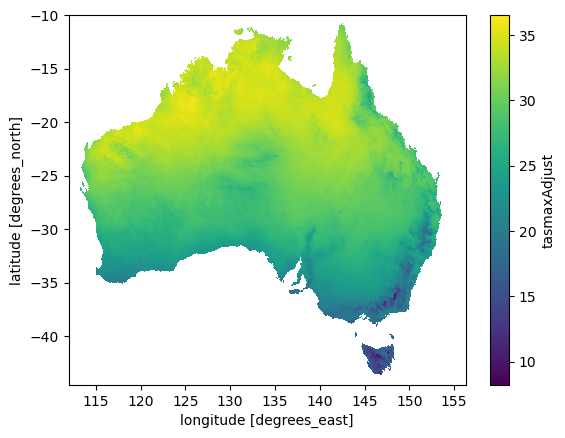

In [6]:
# example of source data file
ds = xr.open_dataset("/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/bias-adjustment-output/AGCD-05i/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1-ACS-QME-AGCD-1960-2022/day/tasmaxAdjust/tasmaxAdjust_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1-ACS-QME-AGCD-1960-2022_day_20150101-20151231.nc")
ds.mean(["time"]).tasmaxAdjust.plot()

In [ ]:
# run bash shell script
# data_extraction.sh

In [ ]:
# combine tasmax and tasmin data from models and calculate tasmean

In [7]:
# from the daily data of one point location
# build a dataframe with tasmin and tasmax daily from all 13 models. 
# then calculate a third set of tasmean 
# then save the csv

locations = pd.read_csv("/g/data/mn51/users/gt3409/TimeSeriesExtraction/UCL_2021_AUST_with_location_top_33.csv")
# coords = pd.read_csv("/g/data/mn51/users/gt3409/TimeSeriesExtraction/UCL_2021_AUST_top_33_coords_only.csv")
coords = list(locations["UCL_CODE21"])


for code in coords:
    combined_df = None
    df_dict = {}
    for var in ["tasmaxAdjust", "tasminAdjust"]:
        for institution_id, parent, downscaling, member in ensemble_members:
            filename = f"{var}_{code}_{institution_id}_{parent}_{downscaling}_{member}_1980to2099"
            file = f"/scratch/eg3/gt3409/{filename}.txt"
            name = f"{var}_{parent}_{downscaling}_{member}"
            df = pd.read_fwf(file, header=None)
            df.columns= ["date", "lon", "lat", name]
            df.name = name
            # drop rows with non-numeric strings
            for col in ["lon", "lat", name]:
                df[col] = pd.to_numeric(df[col], errors="coerce")
                df.dropna(subset=[col], inplace=True)
            # save to dict
            df_dict[name] = df
            if combined_df is None:
                combined_df = df
            else:
                combined_df = combined_df.merge(df,how="outer")
            # combined_df = pd.concat([combined_df, df], axis=1)
    # mean
    var = "tasmeanAdjust"
    for institution_id, parent, downscaling, member in ensemble_members:
        name = f"{var}_{parent}_{downscaling}_{member}"
        combined_df[name] = (combined_df[f"tasmaxAdjust_{parent}_{downscaling}_{member}"] + combined_df[f"tasminAdjust_{parent}_{downscaling}_{member}"])/2
    
    combined_df.insert(1, "code", code)
    combined_df = combined_df.set_index("date")
    combined_df.to_csv(f"/g/data/mn51/users/gt3409/{code}_tasmax-tasmin-tasmean_13models.csv")

In [12]:
combined_df

,code,lon,lat,tasmaxAdjust_ACCESS-CM2_BARPA-R_r4i1p1f1,tasmaxAdjust_ACCESS-ESM1-5_BARPA-R_r6i1p1f1,tasmaxAdjust_CESM2_BARPA-R_r11i1p1f1,tasmaxAdjust_CMCC-ESM2_BARPA-R_r1i1p1f1,tasmaxAdjust_EC-Earth3_BARPA-R_r1i1p1f1,tasmaxAdjust_MPI-ESM1-2-HR_BARPA-R_r1i1p1f1,tasmaxAdjust_NorESM2-MM_BARPA-R_r1i1p1f1,...,tasmeanAdjust_CMCC-ESM2_BARPA-R_r1i1p1f1,tasmeanAdjust_EC-Earth3_BARPA-R_r1i1p1f1,tasmeanAdjust_MPI-ESM1-2-HR_BARPA-R_r1i1p1f1,tasmeanAdjust_NorESM2-MM_BARPA-R_r1i1p1f1,tasmeanAdjust_ACCESS-CM2_CCAM-v2203-SN_r4i1p1f1,tasmeanAdjust_ACCESS-ESM1-5_CCAM-v2203-SN_r6i1p1f1,tasmeanAdjust_CESM2_CCAM-v2203-SN_r11i1p1f1,tasmeanAdjust_CMCC-ESM2_CCAM-v2203-SN_r1i1p1f1,tasmeanAdjust_CNRM-ESM2-1_CCAM-v2203-SN_r1i1p1f2,tasmeanAdjust_EC-Earth3_CCAM-v2203-SN_r1i1p1f1
date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,802001,149.1067,-35.30278,30.39062,24.22656,18.86719,37.06250,27.67969,24.25000,22.78906,...,26.839845,21.886720,18.335940,16.113280,20.226560,19.777345,18.875000,27.019530,26.722655,21.589845
1980-01-02,802001,149.1067,-35.30278,26.49219,26.28125,20.80469,39.95312,33.28125,24.68750,23.32031,...,30.261715,25.359375,17.585940,16.195311,19.476565,20.285155,17.175780,28.710940,26.488280,23.781250
1980-01-03,802001,149.1067,-35.30278,29.64062,28.02344,23.71094,37.39844,34.54688,28.64062,27.23438,...,27.722660,26.316410,20.972655,19.429690,22.710935,22.710940,19.257815,28.656250,29.550780,24.558595
1980-01-04,802001,149.1067,-35.30278,35.38281,32.15625,29.95312,37.40625,34.82031,27.06250,28.34375,...,27.988280,25.714845,20.003905,20.957030,25.953125,23.765630,20.812500,24.929690,25.207030,28.105470
1980-01-05,802001,149.1067,-35.30278,33.33594,27.60156,28.07031,38.49219,36.13281,26.08594,35.43750,...,30.164065,26.863280,20.296875,26.765625,24.375000,23.484370,21.789060,25.894530,20.359375,27.765620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099-12-27,802001,149.1067,-35.30278,37.21094,29.07812,40.10938,43.20312,33.82812,30.21094,28.67188,...,32.363280,27.785155,24.425780,22.179690,23.234380,21.464840,26.519530,27.906250,23.007810,23.230470
2099-12-28,802001,149.1067,-35.30278,37.40625,28.65625,36.10156,43.21094,26.68750,32.31250,30.14062,...,31.664065,22.945310,24.937500,24.269530,26.105470,22.378905,24.828120,24.582035,20.605465,20.730470
2099-12-29,802001,149.1067,-35.30278,28.14844,34.16406,35.67188,27.71875,29.16406,33.56250,34.50000,...,20.566405,24.773435,27.250000,26.980470,22.234375,27.343750,26.542970,16.984370,21.378910,22.210935


In [8]:
# for a quick check, calculate the mean values for each column
# for 1991 to 2020 to compare to online observed climatology
loc_names = list(locations["UCL_NAME21"])

for code, name in zip(coords, loc_names):
    print(f"{code} - {name}")
    df = pd.read_csv(f"/g/data/mn51/users/gt3409/UCL_2021_AUS_top_33_tasmax-tasmin-tasmean/{code}_tasmax-tasmin-tasmean_13models.csv")
    print(df.loc["1991-01-01":"2020-01-01","tasmaxAdjust_ACCESS-CM2_BARPA-R_r4i1p1f1":].mean())

101001 - Sydney
tasmaxAdjust_ACCESS-CM2_BARPA-R_r4i1p1f1              26.336907
tasmaxAdjust_ACCESS-ESM1-5_BARPA-R_r6i1p1f1           26.295285
tasmaxAdjust_CESM2_BARPA-R_r11i1p1f1                  25.380496
tasmaxAdjust_CMCC-ESM2_BARPA-R_r1i1p1f1               25.149542
tasmaxAdjust_EC-Earth3_BARPA-R_r1i1p1f1               24.715032
tasmaxAdjust_MPI-ESM1-2-HR_BARPA-R_r1i1p1f1           25.371364
tasmaxAdjust_NorESM2-MM_BARPA-R_r1i1p1f1              24.760345
tasmaxAdjust_ACCESS-CM2_CCAM-v2203-SN_r4i1p1f1        25.502505
tasmaxAdjust_ACCESS-ESM1-5_CCAM-v2203-SN_r6i1p1f1     26.572980
tasmaxAdjust_CESM2_CCAM-v2203-SN_r11i1p1f1            25.791272
tasmaxAdjust_CMCC-ESM2_CCAM-v2203-SN_r1i1p1f1         24.692942
tasmaxAdjust_CNRM-ESM2-1_CCAM-v2203-SN_r1i1p1f2       26.079796
tasmaxAdjust_EC-Earth3_CCAM-v2203-SN_r1i1p1f1         24.462554
tasminAdjust_ACCESS-CM2_BARPA-R_r4i1p1f1              14.938497
tasminAdjust_ACCESS-ESM1-5_BARPA-R_r6i1p1f1           14.251051
tasminAdjust_CESM2_BARPA

<Axes: xlabel='date'>

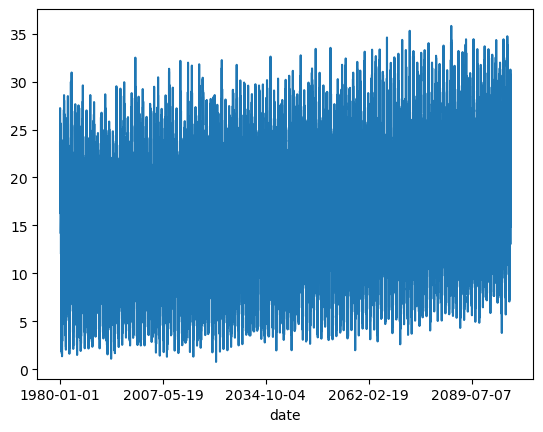

In [9]:
combined_df["tasmeanAdjust_ACCESS-CM2_BARPA-R_r4i1p1f1"].plot()